<a href="https://www.kaggle.com/code/mrafraim/dl-day-14-pytorch-neural-network?scriptVersionId=287855520" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 14: PyTorch Neural Network

Welcome to Day 14! 

Today you will learn:
- How to define a single neuron model in PyTorch
- Forward pass using PyTorch tensors
- Compute loss with built-in functions
- Backpropagation with `.backward()`
- Update weights manually

If you found this notebook helpful, your <b style="color:red;">UPVOTE</b> would be greatly appreciated! It helps others discover the work and supports continuous improvement.

---

# Importing Necessary Libraries

In [1]:
import torch           # main PyTorch framework
import torch.nn as nn  # For building models and layers


# Dataset

In [2]:
# Input:1 sample, 2 features
X = torch.tensor([[1.0, 2.0]]) # (batch_size, features)


# Target value
y = torch.tensor([[1.0]])

# Define Single Neuron Model

In [3]:
class SingleNeuron(nn.Module):
    def __init__(self):
        super().__init__()
        # Linear layer: input=2, output=1
        self.linear = nn.Linear(2,1) # (in_features, out_features)
    
    def forward(self, x):
        z = self.linear(x)  
        y = torch.sigmoid(z)
        
        return y

`class SingleNeuron(nn.Module):`

* Defines a new class called `SingleNeuron`.
* Inherits from `nn.Module` → makes it a PyTorch model.
* `nn.Module` is like a blueprint for all neural network layers in PyTorch.

`def __init__(self):`

* Constructor of the class. Runs once when you create an object.
* `self` → refers to this specific neuron object.

`super().__init__()`

* Initializes the parent class (`nn.Module`).
* Sets up PyTorch internals:

  * Parameter tracking (`self.parameters()`)
  * Device handling (`.to(device)`)
  * Submodules like `self.linear`

`self.linear = nn.Linear(2,1)`

* Creates a linear layer (fully connected layer):

  * Input features = 2
  * Output features = 1
* Think of it as weights (w1, w2) and a bias (b):
  $$ z = w_1 x_1 + w_2 x_2 + b $$
* `self.linear` stores this layer inside the neuron object.

`def forward(self, x):`

* Defines how the neuron processes input.
* `x` → input tensor (e.g., `[x1, x2]`)
* `forward` is automatically called when you do `model(x)`.

`z = self.linear(x)`

* Computes weighted sum (linear transformation):
  $$ z = w_1 x_1 + w_2 x_2 + b $$
* Think: the neuron is “combining the inputs using its weights”.

`y = torch.sigmoid(z)`

* Applies the sigmoid activation function:
  $$ y = \frac{1}{1 + e^{-z}} $$
* Squashes the output to between 0 and 1 → useful for binary outputs.
* This is the non-linear part of the neuron.

`return y`

* Returns the output of the neuron.
* When you do `model(x)`, `y` is what you get.


### Mental model

Imagine the neuron as a tiny machine:

1. **Input**: `[x1, x2]`
2. **Weighted sum**: Multiply inputs by weights, add bias → `z`
3. **Activation**: Squash `z` to 0–1 using sigmoid → `y`
4. **Output**: `y` comes out

Diagrammatically:

```
   x1 ----\
            \
             [weights + sum + bias] --> z --> sigmoid --> y
            /
   x2 ----/
```


# Initialize Model

In [4]:
model = SingleNeuron()   # Create an instance of the neuron
print(model)             # Shows layer structure and parameters

SingleNeuron(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


# Loss Function & Learning Rate

In [5]:
criterion = nn.MSELoss()  # Mean Squared Error for regression
lr = 0.1                  # Learning rate

# Forward Pass & Loss

In [6]:
# Forward pass: predict output
y_pred = model(X)
print("y_pred:", y_pred.item()) # Convert tensor to number

# Loss
loss = criterion(y_pred, y)
print("Initial Loss:", loss.item())  # Convert tensor to number


y_pred: 0.6936873197555542
Initial Loss: 0.09382745623588562


# Backpropagation

In [7]:
# Zero gradients before backward pass
model.zero_grad()

# Compute gradients automatically
loss.backward()


In [8]:
# Print gradients for each parameter
for name, param in model.named_parameters():
    print(f"{name} gradient:\n{param.grad}")


linear.weight gradient:
tensor([[-0.1302, -0.2603]])
linear.bias gradient:
tensor([-0.1302])


# Manual Weight Update (No Optimizer)

In [9]:
# Update weights manually using gradients and learning rate
with torch.no_grad():                # disable gradient tracking
    for param in model.parameters(): # iterate over all trainable parameters
        param -= lr * param.grad     # manual gradient descent step



# Forward Pass After Update

In [10]:
# Forward pass to check loss after weight update
y_pred_new = model(X)
loss_new = criterion(y_pred_new, y)
print("Loss after one update:", loss_new.item())

Loss after one update: 0.08408387005329132


# Mini Training Loop (Optional)

In [11]:
epochs = 50
loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss_history.append(loss.item())
    
    # Backpropagation
    model.zero_grad()
    loss.backward()
    
    # Update weights manually
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
    
    # Print every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.0841
Epoch 10, Loss: 0.0378
Epoch 20, Loss: 0.0231
Epoch 30, Loss: 0.0163
Epoch 40, Loss: 0.0125


# Loss Curve Visualization

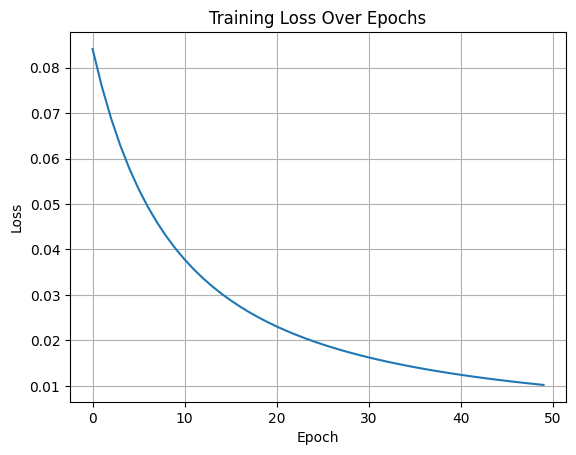

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()


# Key Takeaways from Day 14

- PyTorch `nn.Module` lets you define models cleanly
- Forward pass = model(input)
- Loss functions like `nn.MSELoss` simplify training
- Backpropagation = `.backward()` automatically computes gradients
- Weight update can be manual or via optimizers
- Mini training loop demonstrates real learning

---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
